In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
op = pd.read_excel('original_data.xlsx')
wop = pd.read_csv('world_oil_production.csv')
wosd = pd.read_csv('world_oil_supply_demand.csv')

In [17]:
op.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [5]:
wop.head()

,Year,OECD,OPEC,Rest of the world,Total
0,1971,680.08,1199.28,611.16,2490.52
1,1972,692.26,1283.11,658.43,2633.80
2,1973,695.26,1454.98,720.19,2870.43
3,1974,670.75,1446.02,758.46,2875.23
4,1975,660.24,1274.41,805.25,2739.90


In [6]:
wosd.head()

,Year,Crude oil and NGL production,Total oil demand,Supply-Demand gap (secondary axis)
0,1971,2490.52,2379.40,111.11
1,1972,2633.79,2557.57,76.22
2,1973,2870.44,2761.14,109.30
3,1974,2875.22,2720.10,155.12
4,1975,2739.90,2700.47,39.42


In [18]:
op['year'] = op['Date'].dt.year

In [19]:
op.head()

,Date,Closing Value,year
0,1986-01-02,25.56,1986
1,1986-01-03,26.00,1986
2,1986-01-06,26.53,1986
3,1986-01-07,25.85,1986
4,1986-01-08,25.87,1986


In [20]:
op_year = op.drop(columns='Date',axis=1)

In [21]:
op_year=op_year.groupby('year').sum()

In [23]:
op_year.coloumns

['Year', 'CO_sum']

In [24]:
op_year.head()

,Closing Value
year,
1986,3776.97
1987,4876.93
1988,4103.11
1989,5046.32
1990,6303.33


In [28]:
oil_prod = wop.merge(op_year,left_on='Year', right_on='year')

In [29]:
oil_prod.head()

,Year,OECD,OPEC,Rest of the world,Total,Closing Value
0,1986,956.49,854.12,1124.13,2934.74,3776.97
1,1987,962.71,869.22,1135.16,2967.09,4876.93
2,1988,955.50,993.02,1154.85,3103.37,4103.11
3,1989,918.80,1065.51,1157.64,3141.95,5046.32
4,1990,917.84,1120.81,1148.21,3186.86,6303.33


In [35]:
oil_prod.dtypes

Year                   int64
OECD                 float64
OPEC                 float64
Rest of the world    float64
Total                float64
Closing Value        float64
dtype: object

In [44]:
oil_prod.shape

(33, 6)

In [57]:
oil_prod.columns

Index(['Year', 'OECD', 'OPEC', 'Rest of the world', 'Total ', 'Closing Value'], dtype='object')

In [64]:
oil_prod = oil_prod.rename(columns={'Total ':'Total'})

In [65]:
oil_prod.columns

Index(['Year', 'OECD', 'OPEC', 'Rest of the world', 'Total', 'Closing Value'], dtype='object')

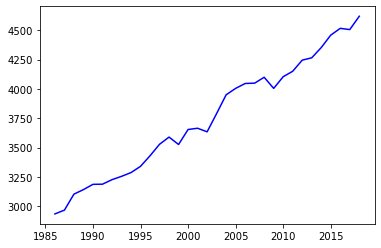

In [71]:
y = oil_prod['Total']
z = oil_prod['Closing Value']
x = oil_prod['Year']

plt.plot(x,y,'b')
plt.show()

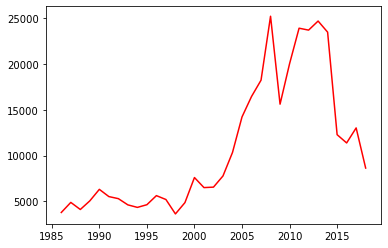

In [72]:
plt.plot(x,z,'r')
plt.show()

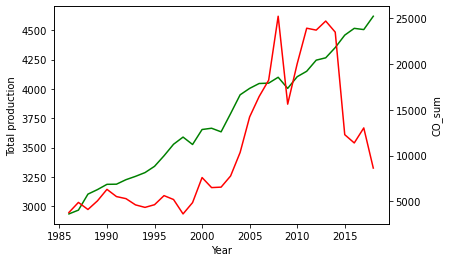

In [74]:
fig, ax1 = plt.subplots()

colour = 'green'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total production')
ax1.plot(x,y,color=colour)

ax2 = ax1.twinx()
ax2.set_ylabel('CO_sum')
ax2.plot(x,z,'r')

#fig.tight_layout()
plt.show()

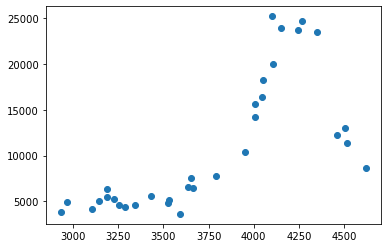

In [76]:
plt.scatter(y,z)
plt.show()